In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from math import sqrt
from brand_lists import *
%matplotlib inline

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)

# scikit-learn modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix

#caricamento dei due dataframe (True Gold Standard & USERS-TAGS table)
user_tags_values = pd.read_csv('final_results/users_tags_values.csv')

#SELEZIONE DEGLI UTENTI DA ANALIZZARE CON IL KNN (SCEGLIERE UNO DEI TRE)
#gold_standard = pd.read_excel('final_results/true_gold_standard.xlsx')       #SOLO UTENTI FOLLOWERS DELLE PAGINE UFFICIALI
gold_standard = pd.read_excel('final_results/sentiment_gold_standard.xlsx')    #SOLO UTENTI ETICHETTATI CON LA SENTIMENT ANALYSIS
#gold_standard = pd.read_excel('final_results/strong_gold_standard.xlsx')      #UTENTI INTERSEZIONE TRA FOLLOWERS E ETICHETTATI CON LA SENTIMENT ANALYSIS


#lista dei tags in ordine del dataframe "user_tags_values"
all_tags_in_order = user_tags_values.drop(columns='User').columns.to_list()

#Lista degli utenti del gold standard
users_list = np.unique(gold_standard['User'].to_list())

#Raggruppamento dei due dataframe in dizionari per facilitare la ricerca degli utenti/etichette interessati
dict_1 = dict(tuple(gold_standard.groupby('Brand')))  #raggruppa gli utenti del gold standard per Brand
dict_2 = dict(tuple(user_tags_values.groupby('User')))     #raggruppa gli utenti di USERS-TAGS table per VETTORI
dict_3 = dict(tuple(gold_standard.groupby('User')))   #raggruppa gli utenti del gold standard per User

#Restituisce il vettore di un utente
def get_user_vector(user):
    user_values = dict_2.get(user)                     #riga dei valori di sentiment
    vector = []
    for tag in all_brands_tags:                     #per ogni tag
        vector.append(user_values[tag].values[0])   #copia il valore letto   
    return np.array(vector)

#Restituisce la/le classe/i di un utente
def get_user_class(user):
    return dict_3.get(user)['Brand'].to_list()

#crea un dataframe di vettori etichettati
def make_df():
    cols = all_tags_in_order.copy()
    cols.append('label')
    tmp = pd.DataFrame(columns=cols)
    for user in users_list:
        v = get_user_vector(user)
        for label in get_user_class(user):
            row = v.tolist()
            row.append(label)
            tmp.loc[len(tmp)] = row
    return tmp

In [10]:
#DATAFRAME CON SOLO I BRAND: MICROSOFT - BARILLA - ADIDAS
#sono inclusi i soli tag di questi tre brand

df = make_df()
brand = ['alfaromeo','samsung','lavazza','armani','ferrero','delonghi','amarelli']
tag = ['baby','car','chocolate',
            'coffee','household appliances','licorice',
            'scent']

for b in brand:
    df = df.drop(df[df['label'] == b].index)
for t in tag:
    df = df.drop(t, axis=1)
df

,clothing,computer,fashion,home,italian,office,pasta,sporty,technology,label
2,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,adidas
5,0.5,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,barilla
9,0.5,0.5,0.5,1.0,0.5,0.5,1.0,0.5,0.5,barilla
13,0.5,0.5,0.5,1.0,1.0,0.5,0.5,0.5,0.5,barilla
20,1.0,0.5,0.5,1.0,0.5,1.0,0.5,1.0,0.5,adidas
...,...,...,...,...,...,...,...,...,...,...
318,0.5,0.5,0.5,0.5,0.5,1.0,0.5,0.5,1.0,microsoft
319,0.5,0.5,0.5,1.0,0.5,0.5,1.0,0.5,0.5,barilla
323,1.0,1.0,0.0,1.0,0.5,0.5,0.5,0.5,1.0,microsoft
325,0.0,0.5,1.0,1.0,1.0,0.0,0.5,1.0,0.5,barilla


In [42]:
#CREAZIONE DEI DATI PER L'ANALIDI DEL KNN

features = ['clothing','computer','fashion',
            'home', 'italian', 'office',
            'pasta','technology','sporty']


#VARIABILE x = I VETTORI
#VARIABILE y = LE ETICHETTE 
x = df[features]
y = df['label']

# Splitting del dataset in training e test (80% training - 20% set)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)


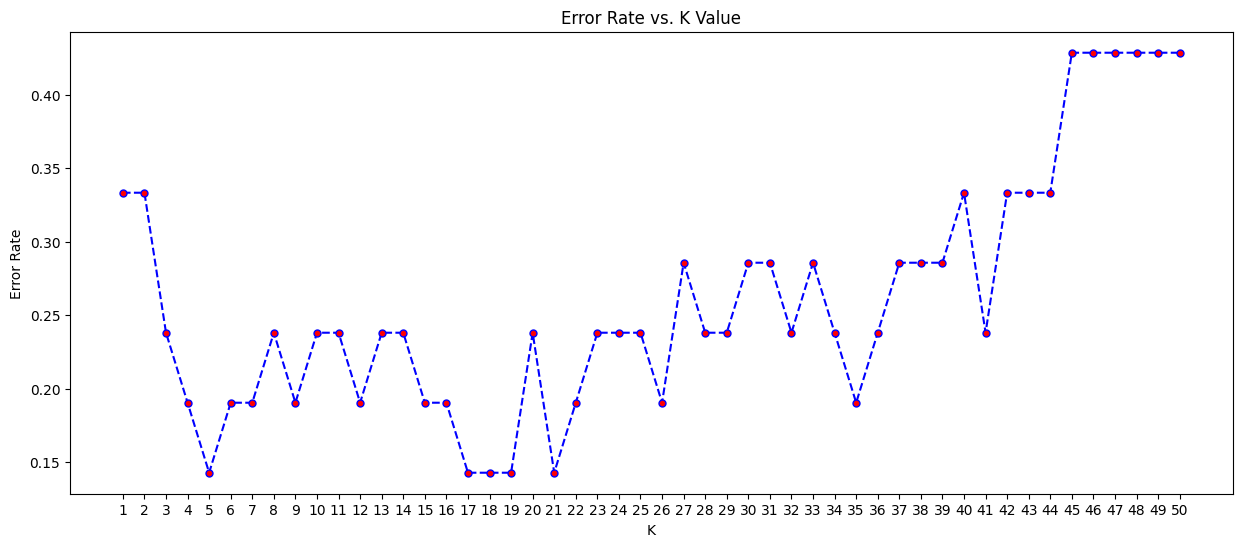

In [43]:
#ESECUZIONE DEL KNN PER DIVERSI K
#Mostra il tasso di errore

error_rate = []
k_min = 1
k_max = 51
for i in range(k_min,k_max):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15,6))
plt.plot(range(k_min,k_max),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.xticks(range(k_min,k_max))
plt.ylabel('Error Rate')
plt.show()


Classification Report (K = 5 )
              precision    recall  f1-score   support

      adidas       0.80      0.67      0.73         6
     barilla       0.89      0.89      0.89         9
   microsoft       0.86      1.00      0.92         6

    accuracy                           0.86        21
   macro avg       0.85      0.85      0.85        21
weighted avg       0.85      0.86      0.85        21

KNN Classification Accuracy of the model (K = 5 ): 85.71%


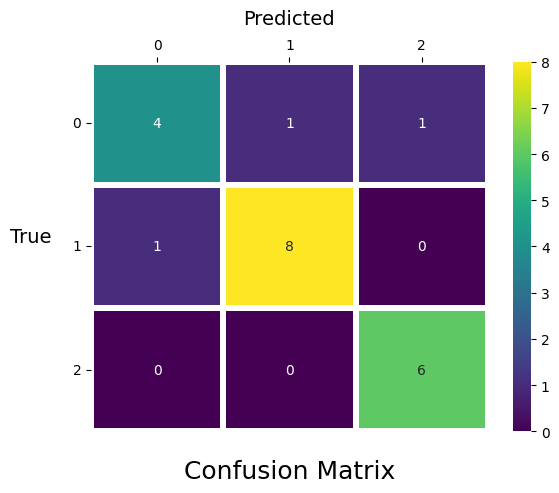

In [44]:
#ESECUZIONE DEK KNN

#valore di K 
K = 5

# Fitting KNN Classifier to the Training set
model = KNeighborsClassifier(n_neighbors = K, metric = 'euclidean', p = 2)
model.fit(x_train, y_train)

# Predicting the results
y_pred = model.predict(x_test)

# Classification Report
print("\nClassification Report (K =",K,")")
report = classification_report(y_test, y_pred,zero_division=1)
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('KNN Classification Accuracy of the model (K =',K,'): {:.2f}%'.format(accuracy*100))

#Confusion matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(confusionmatrix, annot=True, linewidth=3, cmap='viridis')
plt.xlabel("Confusion Matrix", fontsize=18, labelpad=20)
ax.xaxis.tick_top()
plt.ylabel("True", fontsize=14, rotation=0, labelpad=30)
plt.yticks(rotation=0)
plt.title("Predicted", fontsize=14, pad=10)
plt.show()

In [49]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

col_name = 'Predicted-label (K='+str(K)+")"
predictions = pd.DataFrame({'label': y_test, col_name : y_pred}).reset_index()
predictions.sort_index()

,index,label,Predicted-label (K=5)
0,282,barilla,barilla
1,292,microsoft,microsoft
2,308,barilla,barilla
3,102,barilla,barilla
4,225,barilla,barilla
5,224,adidas,barilla
6,22,microsoft,microsoft
7,68,microsoft,microsoft
8,150,barilla,barilla
9,190,microsoft,microsoft


In [50]:
#TABELLA DI COMPARAZIONE

compare_df = df
compare_df = compare_df.reset_index()
user_df = gold_standard['User'].reset_index()
compare_df = compare_df.merge(user_df, on=["index"])
compare_df = compare_df.merge(predictions, on=["index","label"])

predict_col_name = compare_df.iloc[:,-1:].columns[0]
compare_df = compare_df[['index','User',
                        'clothing','computer','fashion',
                        'home', 'italian', 'office',
                        'pasta','technology','sporty',
                        'label',predict_col_name]]

clean_compare_df = compare_df[['index','User','label',predict_col_name]]

#SALVA I RISULTATI
#clean_compare_df.to_excel('final_results/sklearn_knn_predictions_compatc.xlsx',index=False)
#compare_df.to_excel('final_results/sklearn_knn_predictions.xlsx',index=False)

clean_compare_df

,index,User,label,Predicted-label (K=5)
0,2,21Phylk,adidas,adidas
1,22,CLHNews,microsoft,microsoft
2,39,ColU_CF,adidas,adidas
3,44,Davey_Mitchell,adidas,adidas
4,67,FirstMediaTeam,adidas,microsoft
5,68,FirstMediaTeam,microsoft,microsoft
6,102,JPGirl3,barilla,barilla
7,133,MarkPerozziello,barilla,barilla
8,150,MuseoArpaSalvi,barilla,barilla
9,163,PrecisionProco,microsoft,microsoft
